# A/B Testing Marketing Slogans: Measuring Impact on Purchase Intention

## Introduction and theoretical justification

This A/B testing report addresses a branding challenge faced by The North Face, a global outdoor apparel company. The company is considering changing its well-known motto from "Never stop exploring" to "We play different" as part of a rebranding effort. However, The North Face is uncertain how this change might affect customer behavior, particularly their purchase decisions, which are crucial for sales performance. The key communication challenge, therefore, is to determine whether the new motto resonates with consumers or negatively impacts their purchasing decisions. This leads to the following research question: “To what extent does changing The North Face’s motto from ‘Never stop exploring’ to ‘We play different’ affect customer purchase behavior?”

Brand slogans play a crucial role in shaping a company’s identity and influencing customer perceptions of its values and culture. Previous research (Setiani et al., 2018) indicates that corporate rebranding can significantly impact brand loyalty and, in turn, customer purchase intentions. While advertising slogan changes have been shown to increase firms' market value (Mathur & Mathur, 1995), these effects tend to emerge over a longer period. In the short term, however, the impact on customer purchase behavior may be less positive. Additionally, previously analyzed cases of slogan changing cases, found that younger consumers, the main consumer groups of The North Face, place greater emphasis on emotional connection and lifestyle alignment when making purchase decisions (Liu, 2022). The original slogan, "Never stop exploring," expresses a sense of adventure and emotional appeal, aligning with this lifestyle. In contrast, the new slogan, "We play different," may lack the same emotional resonance, potentially leading to a negative effect on purchase behavior. Therefore, we hypothesize that the new motto “We play different” has a negative effect on consumer purchase behavior compared to the original motto “Never stop exploring”.

## Gathering Data

The data for this A/B test were collected over one month, during which two versions of The North Face’s official webshop were presented: Version A with the original motto, "Never stop exploring," and Version B with the proposed motto, "We play different." The other design of the webshop was the same. This design enabled real-time capture of purchasing behavior, with the dependent variable being whether a customer made a purchase and the independent variable being the website version viewed (A or B).

Two datasets were utilized for this report. The first dataset, the trace dataset, contains all digital traces from webshop sessions, including consumer purchase behavior, generated using Google Analytics. The second dataset includes session-specific information, such as the version viewed, referral platform, user location, and device, gathered through Google Tag Manager.

All personal consumer information was fully anonymized during data collection, ensuring privacy. Google Analytics recorded only session-related data, excluding any identifiable user information.

However, a potential bias exists, as customers visiting the site may not represent the entire customer base, possibly skewed toward those interested in promotions or seasonal sales. Additionally, the analysis focused exclusively on online purchases and excluded offline customers.

### Loading and merging data

In [1]:
import pandas as pd

Import pandas package and rename it as pd.

In [2]:
trace = pd.read_json('Chen_Xin_session_data.jsonl', lines = True)

Import jsonal file of digital trace information

In [3]:
len(trace)

6179

Check the length of the data frame, and it shows that there is 6179 rows.

In [4]:
trace.head()

info
0  {'click': 1.0, 'time_spent': 11.27578947368421...
1  {'click': 1.0, 'time_spent': 46.52631578947368...
2  {'click': 1.0, 'time_spent': 46.52631578947368...
3  {'click': 1.0, 'time_spent': 19.15789473684210...
4  {'click': 1.0, 'time_spent': 5.911578947368421...

Check the first five rows of the dataset, and it shows that the data was compressed, that need normalization.

In [5]:
trace = pd.json_normalize(trace['info'])
trace.head()

click  time_spent  _purchase  purchase_amount     id
0    1.0   11.275789        1.0        35.778947  13787
1    1.0   46.526316        1.0       147.631579  13791
2    1.0   46.526316        1.0       147.631579  13794
3    1.0   19.157895        1.0        60.789474  13795
4    1.0    5.911579        1.0        18.757895  13796

Therefore, I use the function json_normalize on the info column in the dataset trace and name the new data frame still trace. And then, I use the head function to see the first five rows of the normalized dataset. The result shows that it is successfully normalized.

In [6]:
trace.columns

Index(['click', 'time_spent', '_purchase', 'purchase_amount', 'id'], dtype='object')

Then, I use columns function to check the columns in the data frame. The result shows that there are five columns, which are 'click', 'time_spent', '_purchase', 'purchase_amount', 'id'.

In [7]:
trace.dtypes

click              float64
time_spent         float64
_purchase          float64
purchase_amount    float64
id                   int64
dtype: object

Here I checked the datatypes of all of the columns, and it shows that id is an integer, other columns are floats, which is good.

In [8]:
trace.isna().sum()

click              0
time_spent         0
_purchase          0
purchase_amount    0
id                 0
dtype: int64

Here, I use isna to check the missing value and use sum to let it indicate the numbers of the missing value. The result shows that all columns have no missing values.

In [9]:
session=pd.read_csv('Chen_Xin_session_data.csv.gz')

Here I import another dataset of the purchase session and then name it session.

In [10]:
len(session)

16165

I check the length of the session dataset, and it contains 16165 items.

In [11]:
session.head()

session_timestamp                                             device  \
0  2023-02-10 10:56:39  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...   
1  2023-02-11 12:16:19  Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...   
2  2023-02-11 09:32:57  Opera/8.58.(Windows NT 5.01; iw-IL) Presto/2.9...   
3  2023-02-10 10:33:19  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...   
4  2023-02-12 01:38:06  Opera/9.72.(X11; Linux i686; eu-ES) Presto/2.9...   

      ABtest                 referral geoNetwork_country screenresolution  \
0  version_B  https://www.adkins.org/                NaN       2560  1080   
1        NaN               google.com                 AM       3840  2160   
2  version_B             facebook.com                NaN       1920  1080   
3  version_B              momondo.com                 NL        1366  768   
4  version_A             facebook.com                 NL       2048  1536   

            city  sess_id  userid  
0  Stephaniestad    13787       0  
1  Grahamchester    13788       1  
2  Jenniferburgh    13789       2  
3  Georgeborough    13790       3  
4  Port Kellyton    13791       4

Here I checked the first five items of the session dataset, and it looks good to me.

In [12]:
session.columns

Index(['session_timestamp', 'device', 'ABtest', 'referral',
       'geoNetwork_country', 'screenresolution', 'city', 'sess_id', 'userid'],
      dtype='object')

Here, I check the columns of the session data frame, and it shows that it contains 9 columns, which are 'session_timestamp', 'device', 'ABtest', 'referral','geoNetwork_country', 'screenresolution', 'city', 'sess_id', 'userid'.

In [13]:
session.dtypes

session_timestamp     object
device                object
ABtest                object
referral              object
geoNetwork_country    object
screenresolution      object
city                  object
sess_id                int64
userid                 int64
dtype: object

Then I checked the data types of the columns in session data frame, and 'sess_id' and 'userid' are integers, others are objects as they are supposed to be, except session_timestamp. However, session time is not relevant to my research question therefore I did not change it.

In [14]:
session.isna().sum()

session_timestamp        0
device                   0
ABtest                4074
referral                 0
geoNetwork_country    6988
screenresolution         0
city                     0
sess_id                  0
userid                   0
dtype: int64

Here, I use isna to check the missing value and use sum to let it indicate the numbers of the missing value. The result shows that all columns have no missing values.

In [15]:
session['sess_id'].value_counts()

sess_id
13787    1
24569    1
24556    1
24557    1
24558    1
        ..
19180    1
19181    1
19182    1
19183    1
29951    1
Name: count, Length: 16165, dtype: int64

Here I checked the value count of each value in the 'sess_id' column in session dataset, and the result shows that there is no repeated session id included, which is good.

In [16]:
trace['id'].value_counts()

id
13787    1
24636    1
24561    1
24560    1
24559    1
        ..
19088    1
19085    1
19083    1
19081    1
29947    1
Name: count, Length: 6179, dtype: int64

Similarly, here I checked the value count of each value in the 'id' column in the trace dataset, and the result shows that there is no repeated session id included, which is good.

In [17]:
session.dtypes

session_timestamp     object
device                object
ABtest                object
referral              object
geoNetwork_country    object
screenresolution      object
city                  object
sess_id                int64
userid                 int64
dtype: object

I want to merge these two datasets with session id, so first I have to make sure they have the same data type. In the result we can see the column 'sess_id' is an integer.

In [18]:
trace.dtypes

click              float64
time_spent         float64
_purchase          float64
purchase_amount    float64
id                   int64
dtype: object

Now, I check the data type of session id in the trace data frame, and it shows it is also integer, the same as the 'sess_id' in session.

In [19]:
df = session.merge(trace, how='left', left_on='sess_id', right_on='id')

Here, I did a left merge for session and trace dataset, so added the data of trace on session data frame, and they merge on 'sess_id' in session data frame, and 'id' on the trace data frame. And I name the new merged data frame df.

In [20]:
df.head()

session_timestamp                                             device  \
0  2023-02-10 10:56:39  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...   
1  2023-02-11 12:16:19  Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...   
2  2023-02-11 09:32:57  Opera/8.58.(Windows NT 5.01; iw-IL) Presto/2.9...   
3  2023-02-10 10:33:19  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...   
4  2023-02-12 01:38:06  Opera/9.72.(X11; Linux i686; eu-ES) Presto/2.9...   

      ABtest                 referral geoNetwork_country screenresolution  \
0  version_B  https://www.adkins.org/                NaN       2560  1080   
1        NaN               google.com                 AM       3840  2160   
2  version_B             facebook.com                NaN       1920  1080   
3  version_B              momondo.com                 NL        1366  768   
4  version_A             facebook.com                 NL       2048  1536   

            city  sess_id  userid  click  time_spent  _purchase  \
0  Stephaniestad    13787       0    1.0   11.275789        1.0   
1  Grahamchester    13788       1    NaN         NaN        NaN   
2  Jenniferburgh    13789       2    NaN         NaN        NaN   
3  Georgeborough    13790       3    NaN         NaN        NaN   
4  Port Kellyton    13791       4    1.0   46.526316        1.0   

   purchase_amount       id  
0        35.778947  13787.0  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4       147.631579  13791.0

Here, I check the first five items of the merged data frame, and we can see the columns from previous data frame were merged together.

In [21]:
len(df)

16165

The length of the merged dataframe is 16165, the same with the length of session data frame, which makes sense.

## Data cleaning

In [22]:
df = df[['ABtest', 'referral', 'device', 'id', '_purchase', 'sess_id' ]]

Here, I did data minimization because there are too many columns in the dataset, so I only kept the relevant columns: 'ABtest', 'referral', 'device', 'id', '_purchase', 'purchase_amount', 'sess_id'. And I created a new data frame called df with the columns I had chosen. The following lists will explain what are each variable.

ABtest: This variable recorded which version of the web shop was shown in each session, version A is with the original slogan 'Never stop exploring', and version B is with the new slogan 'We play different'.

Referral: This variable indicates which platform were the customers referred from to this webshop.

Device: This device recorded what type of device is used for each session.

Purchase: This variable is the dependent variable, which indicates if the session has achieved a purchase in the webshop.

Session id: This variable attaches a unique value to every session, so we can differentiate different sessions.

ABtest is the IV, purchase is DV, and referral and device were included as control variables.

In [23]:
df.head()

ABtest                 referral  \
0  version_B  https://www.adkins.org/   
1        NaN               google.com   
2  version_B             facebook.com   
3  version_B              momondo.com   
4  version_A             facebook.com   

                                              device       id  _purchase  \
0  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...  13787.0        1.0   
1  Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...      NaN        NaN   
2  Opera/8.58.(Windows NT 5.01; iw-IL) Presto/2.9...      NaN        NaN   
3  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...      NaN        NaN   
4  Opera/9.72.(X11; Linux i686; eu-ES) Presto/2.9...  13791.0        1.0   

   sess_id  
0    13787  
1    13788  
2    13789  
3    13790  
4    13791

When I check the new data frame, it is already successfully minimized.

In [24]:
df.isna().sum()

ABtest       4074
referral        0
device          0
id           9986
_purchase    9986
sess_id         0
dtype: int64

When I check the missing values of the dataset, it shows that AB test columns have 4074 items, and id, purchase, and purchase amount are 9986. I will explain what I did to deal with missing value later.

In [25]:
df = df.dropna(subset=['ABtest'])

When I checked the head of the original session data frame, there were items without indication of which version of the session was from. Because of this A/B test is only testing which version of slogan is more effective, so I will exclude those rows without indication.

In [26]:
df.isna().sum()

ABtest          0
referral        0
device          0
id           6706
_purchase    6706
sess_id         0
dtype: int64

Now I can see that all of rows with missing values in AB test is gone.

In [27]:
trace['_purchase'].describe()

count    6179.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: _purchase, dtype: float64

Here I check the descriptive data of '_purchase' column, and it shows that all of the values are 1, this means that trace dataset only includes session with a purchase.

In [28]:
def fix_landing(landing):
    if str(landing).lower() == 'nan':
        return 0
    return 1

Here I create a function called fix_landing, which is the lowercase text is equal to nan, then it returns value 0, otherwise return value 0.

In [29]:
df['purchase'] = df['_purchase'].apply(fix_landing)

I create a new column named 'purchase' and applied this function to the column '_purchase', because in the original trace dataset, there is no missing value, and the amount of missing value for 'id', '_purchase', and 'purchase_amount' is the same. This indicates that the missing value comes from the unmatched session id while merging. Therefore, for purchase, the missing value is the session that did not make a purchase. Therefore, by applying this function, I can create a dummy variable that when purchase is made, it attach value 1, and 0 when no purchase is made.

In [30]:
df['purchase'].describe()

count    12091.000000
mean         0.445373
std          0.497027
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: purchase, dtype: float64

Then I checked the descriptives of the new purchase dummy variable, and we can see that more people did not purchase anything compare to people who actually made a purchase.

I checked the descriptives of the new purchase amount column, and it shows that, on average, people make 36.1 euros in my sample.

In [31]:
len(df)

12091

The length of the new dataset without missing value in 'ABtest' column is 12091.

In [32]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

Here I used a function of query in text copied from the tutorial. Basically, if the query is mentioned, it returns value 1, otherwise returns value 0.

In [33]:
df['version_A'] = df['ABtest'].apply(wordlist_any_present, args=(['version_A'],)) 

I applied the function to the column of 'ABtest' in df, and the query is 'version_A', and created a new variable called 'version_A' with new value.

In [34]:
df['ABtest'].value_counts()

ABtest
version_B    6100
version_A    5991
Name: count, dtype: int64

To test the function, we can see that in 'ABtest' column, we can see 5991 session is from version A.

In [35]:
df['version_A'].value_counts()

version_A
0    6100
1    5991
Name: count, dtype: int64

Also 5991 items have a value of 1 in the new variable, which means 5991 sessions were from version A which is the same with the result above. Therefore, the function is run successfully.

In [36]:
df['version_B'] = df['ABtest'].apply(wordlist_any_present, args=(['version_B'],)) 

I did the same thing with version_B, I don't have to because there are only two groups, but I did it just to make sure.

In [37]:
df['version_B'].value_counts()

version_B
1    6100
0    5991
Name: count, dtype: int64

We can see the value count of 'version_B' is also correct.

In [38]:
df.head()

ABtest                 referral  \
0  version_B  https://www.adkins.org/   
2  version_B             facebook.com   
3  version_B              momondo.com   
4  version_A             facebook.com   
5  version_B                kayak.com   

                                              device       id  _purchase  \
0  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...  13787.0        1.0   
2  Opera/8.58.(Windows NT 5.01; iw-IL) Presto/2.9...      NaN        NaN   
3  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...      NaN        NaN   
4  Opera/9.72.(X11; Linux i686; eu-ES) Presto/2.9...  13791.0        1.0   
5  Mozilla/5.0 (Windows CE; eu-ES; rv:1.9.0.20) G...      NaN        NaN   

   sess_id  purchase  version_A  version_B  
0    13787         1          0          1  
2    13789         0          0          1  
3    13790         0          0          1  
4    13791         1          1          0  
5    13792         0          0          1

Now let's clean the additional control variables in the dataset, so I take look at the dataset again.

In [39]:
def wordlist_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    if set(newquery).issubset(tokens):
        return 1
    return 0

For additional user variables, I used the same function as before.

In [40]:
df['google_refer'] = df['referral'].apply(wordlist_any_present, args=(['google'],))

I applied this function to 'referral' column in df, and the query is 'google', and create a new column 'google_refer', where if the google is mention, then it has a value 1, otherwise 0. 

In [41]:
df['apple_device'] = df['device'].apply(wordlist_any_present, args=(['Macintosh', 'iOS'],))

I did the same thing to 'device' column, the queries are Macintosh', 'iOS'. And apple device has a value 1, and other device has value 0 in the new column 'apple_device'.

In [42]:
df.head()

ABtest                 referral  \
0  version_B  https://www.adkins.org/   
2  version_B             facebook.com   
3  version_B              momondo.com   
4  version_A             facebook.com   
5  version_B                kayak.com   

                                              device       id  _purchase  \
0  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_5...  13787.0        1.0   
2  Opera/8.58.(Windows NT 5.01; iw-IL) Presto/2.9...      NaN        NaN   
3  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...      NaN        NaN   
4  Opera/9.72.(X11; Linux i686; eu-ES) Presto/2.9...  13791.0        1.0   
5  Mozilla/5.0 (Windows CE; eu-ES; rv:1.9.0.20) G...      NaN        NaN   

   sess_id  purchase  version_A  version_B  google_refer  apple_device  
0    13787         1          0          1             0             1  
2    13789         0          0          1             0             0  
3    13790         0          0          1             0             0  
4    13791         1          1          0             0             0  
5    13792         0          0          1             0             0

Let's take a look at the new dataset, we can see all of the new columns are already added.

In [43]:
data = df[['ABtest', 'sess_id', 'purchase', 'version_A', 'version_B', 'google_refer', 'apple_device' ]]

I created a new dataset called data with only relevant column: 'ABtest', 'sess_id', 'purchase', 'purchase amount', 'version_A', 'version_B', 'google_refer', 'apple_device' from df. 

In [44]:
data.head()

ABtest  sess_id  purchase  version_A  version_B  google_refer  \
0  version_B    13787         1          0          1             0   
2  version_B    13789         0          0          1             0   
3  version_B    13790         0          0          1             0   
4  version_A    13791         1          1          0             0   
5  version_B    13792         0          0          1             0   

   apple_device  
0             1  
2             0  
3             0  
4             0  
5             0

This is how the data data frame looks like.

In [45]:
data.isna().sum()

ABtest          0
sess_id         0
purchase        0
version_A       0
version_B       0
google_refer    0
apple_device    0
dtype: int64

And there is no missing values in this new dataset.

## Data exploration and visualisation

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

Here I import all of the models I need for analysis.

In [47]:
import numpy as np
import lime
from lime import lime_tabular

Also Lime.

In [48]:
data[['ABtest', 'version_A', 'version_B', 'purchase', 'google_refer', 'apple_device']].describe().transpose()

count  mean   std   min   25%   50%   75%   max
version_A    12091.000 0.495 0.500 0.000 0.000 0.000 1.000 1.000
version_B    12091.000 0.505 0.500 0.000 0.000 1.000 1.000 1.000
purchase     12091.000 0.445 0.497 0.000 0.000 0.000 1.000 1.000
google_refer 12091.000 0.301 0.459 0.000 0.000 0.000 1.000 1.000
apple_device 12091.000 0.144 0.351 0.000 0.000 0.000 0.000 1.000

Here are the descriptives of columns 'version_A', 'version_B', 'purchase', 'purchase amount', 'google_refer', 'apple_device'. We can take a look to get a general idea.
This table shows that the average score of the version_A dummy variable is 0.495, which indicates that 49.5% of the sessions are shown in version A webshop with the original motto. Version B was shown 50.5% of the whole sample. And 44.5% of the sample session has done a purchase order through the webshop. And 30.1% of the customers were referred by Google, 69.9% from other platforms. And 14.4% of the customers were using Apple devices. 

<Axes: xlabel='ABtest', ylabel='count'>

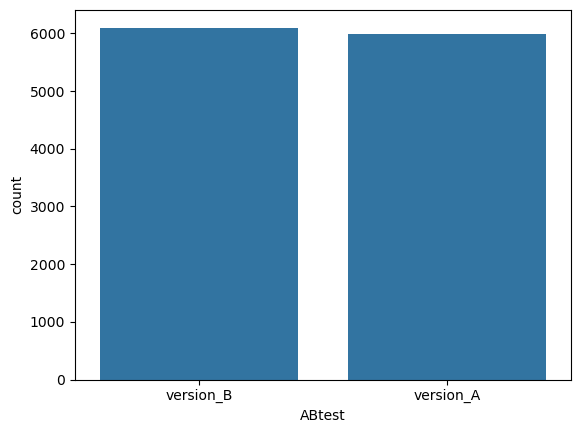

In [49]:
sns.countplot(x = 'ABtest', data=data)

A count plot for univariate 'ABtest' is created, and we can see that two versions have pretty much the same counts.

<Axes: xlabel='google_refer', ylabel='count'>

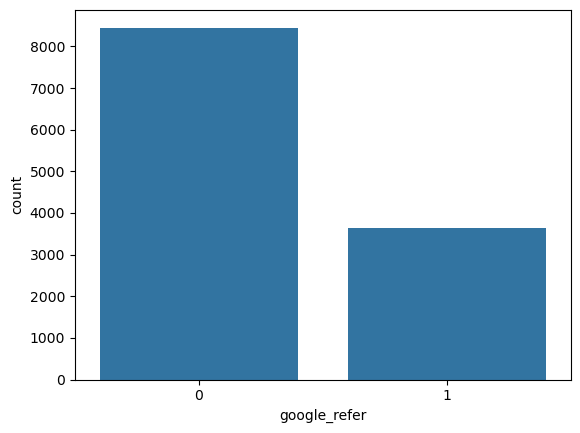

In [50]:
sns.countplot(x = 'google_refer', data=data)

A count plot for univariate 'google_refer' is created, and we can see that approximately twice the size of people were referred not from google compared to people who were referred from google.

<Axes: xlabel='apple_device', ylabel='count'>

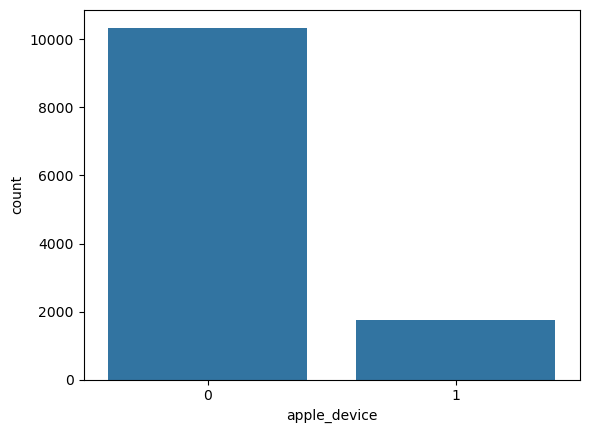

In [51]:
sns.countplot(x = 'apple_device', data=data)

A count plot for univariate 'apple_device' is created, and we can see that approximately twice the size of people who were not using apple devices compared to people who were using apple devices.

<Axes: xlabel='purchase', ylabel='count'>

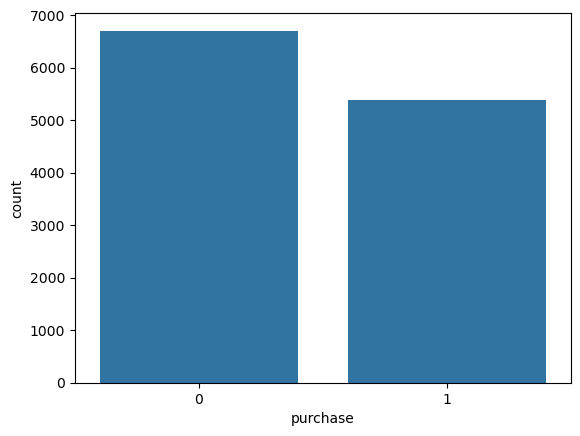

In [52]:
sns.countplot(x = 'purchase', data=data)

A count plot for univariate 'purchase' is created, and we can see that nearly half of the people made a purchase, the amount of people who did not make purchase is about 1000 more than people who did make a purchase.

<Axes: xlabel='version_A', ylabel='purchase'>

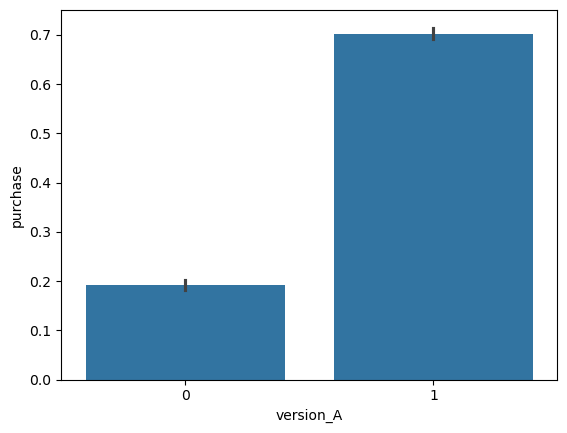

In [53]:
sns.barplot(x='version_A', y='purchase', data=data)

A barplot was created for the relationship between purchase and version of slogan participant viewed. It indicates that the people who are directed from version A probably have a significantly higher probability of purchase.

<Axes: xlabel='google_refer', ylabel='purchase'>

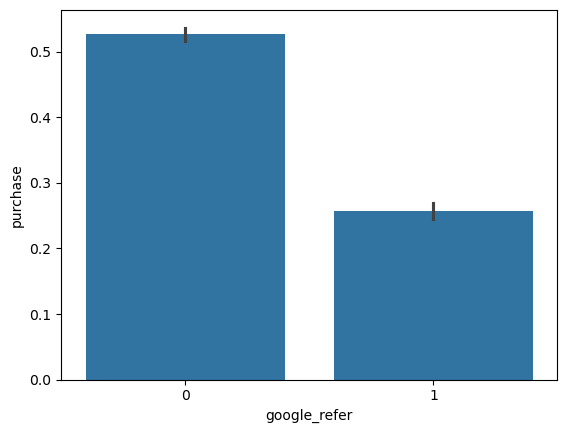

In [54]:
sns.barplot(x='google_refer', y='purchase', data=data)

A barplot was created for the relationship between the purchase and referral platform. It indicates that the people who are referred by google probably have a significantly lower probability of purchase.

<Axes: xlabel='apple_device', ylabel='purchase'>

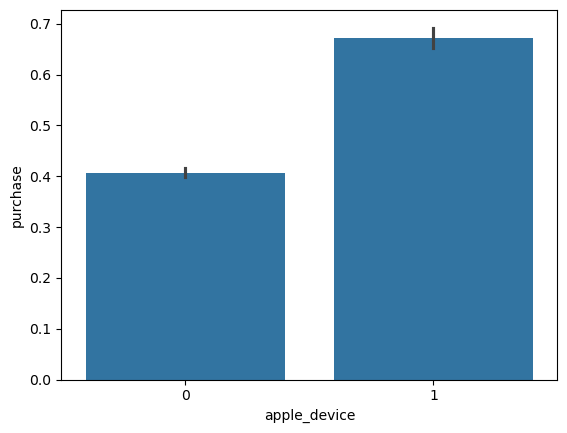

In [55]:
sns.barplot(x='apple_device', y='purchase', data=data)

A barplot was created for the relationship between purchases and devices. It indicates that the people who are using a apple device probably have a significantly higher probability of purchase.

#### Findings of data exploration

From the descriptive data and univariate bar plots of each variable, we observe that the final dataset contains a total of 12,091 sessions. The webshops for version A and version B were presented equally to customers, with approximately 49.5% of sessions allocated to version A (the original motto) and 50.5% to version B. Among these sessions, 44.5% resulted in a purchase order through the webshop. Additionally, 30.1% of customers were referred by Google, while 69.9% came from other platforms. Notably, 14.4% of customers used Apple devices.

The relational bar plot illustrating the relationship between the webshop version and customer purchase behavior indicates that customers who viewed version A exhibited a significantly higher probability of making a purchase, with a purchase index score approximately 0.5 higher than that of version B. The huge distance between confidence intervals depicted in the bar plot suggests that this positive effect might be significant; however, statistical analysis is needed to confirm this.

Similarly, customers referred from Google showed a significantly lower likelihood of making a purchase compared to those referred from other platforms. In contrast, customers using Apple devices demonstrated a significantly higher chance of completing a purchase than those using non-Apple devices.

## Modelling and hypothesis testing

### Split data for training and testing 

In [56]:
from sklearn.model_selection import train_test_split

Import the package.

In [57]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

Now I split the original dataset into two, with 80% for training and 20% for testing. By doing this, I can evaluate different models and identify which one is better. (random state was there to make sure other people generated the same dataset)

In [58]:
train.head()

ABtest  sess_id  purchase  version_A  version_B  google_refer  \
5539   version_B    19326         0          0          1             1   
4588   version_B    18375         0          0          1             0   
1301   version_A    15088         1          1          0             0   
10612  version_A    24399         1          1          0             0   
13865  version_A    27652         1          1          0             0   

       apple_device  
5539              0  
4588              0  
1301              0  
10612             0  
13865             0

Let's take a look at the training dataset, looks good.

In [59]:
len(train)

9672

The length of the training dataset is 9672.

In [60]:
test.head()

ABtest  sess_id  purchase  version_A  version_B  google_refer  \
627   version_A    14414         1          1          0             0   
4284  version_A    18071         1          1          0             0   
721   version_A    14508         0          1          0             0   
6241  version_A    20028         1          1          0             0   
8509  version_A    22296         1          1          0             1   

      apple_device  
627              1  
4284             0  
721              0  
6241             0  
8509             1

Also look at the test dataset.

In [61]:
len(test)

2419

The length of the test dataset is 2419.

In [62]:
len(data), len(train), len(test), len(train) / len(data), len(test) / len(data)

(12091, 9672, 2419, 0.7999338350839468, 0.20006616491605325)

Now, let's take a look at the length of the original and train and test datasets and the proportion. We can see that the training dataset is indeed nearly 80% of the original dataset, and the test dataset is nearly 20%.

### Probabilities for purchase using Logistic Regression

Because my IV slogan version of the webshop, and purchase behavior are both categorical dummy variables. Therefore, logistic regression model is used.

#### Logistic regression model 1: slogan versions on purchase

Model 1 will only include different versions of the slogan of the webshop as independent variable and purchase as the dependent variable.

In [63]:
target = "purchase"
features = ['version_A']

Define 'purchase' as target and 'version_A' as feature for the logistic regression.

In [64]:
logit_stats = sm.Logit(train[target], sm.add_constant(train[features]))

In [65]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.548411
         Iterations 5


Here I just used standard code to define the logistic regression and then fit the model into the data.

In [66]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                 9672
Model:                          Logit   Df Residuals:                     9670
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.2017
Time:                        16:55:30   Log-Likelihood:                -5304.2
converged:                       True   LL-Null:                       -6644.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4318      0.036    -39.544      0.000      -1.503      -1.361
version_A      2.2944      0.048     47.684      0.000       2.200       2.389


Here are the results of the logistic regression, we can see that version A has a significant positive effect on purchase, coef = 2.29, p < .001.

#### Logistic regression model 2 with additional user control variables

In [67]:
features_controls = ['version_A', 'google_refer', 'apple_device']

Now, the features with control variables include slogan version, referral platform and device used.

In [68]:
logit_stats_user = sm.Logit(train[target], sm.add_constant(train[features_controls]))

In [69]:
result_logit_user = logit_stats_user.fit()

Optimization terminated successfully.
         Current function value: 0.479802
         Iterations 6


Here a standard logistic regression was run with the new features.

In [70]:
print(result_logit_user.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                 9672
Model:                          Logit   Df Residuals:                     9668
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.3016
Time:                        16:55:30   Log-Likelihood:                -4640.6
converged:                       True   LL-Null:                       -6644.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4022      0.043    -32.829      0.000      -1.486      -1.319
version_A        2.7217      0.056     48.289      0.000       2.611       2.832
google_refer    -1.7028      0.061    -27.96

We can see that the slogan version A still has a significant positive effect on purchases than version B. Google as a referral platform has a negative effect on purchases compared to all of the other platforms. And people who have apple device has a higher chance to purchase than non-apple users.

### Comparing the Two Logistic Regression Models

Then, I have to compare these two logistic models, and check which one is better. First, I'll ask for predictions on the test set by the first model:

In [71]:
test['predicted_prob_logit'] = result_logit.predict(
    sm.add_constant(test[features])
)

test['predicted_purchase_logit'] = (
    test['predicted_prob_logit'] > 0.5
).astype(int)

In [72]:
test['predicted_purchase_logit'].value_counts()

predicted_purchase_logit
1    1220
0    1199
Name: count, dtype: int64

In [73]:
test[['purchase', 'predicted_purchase_logit']].head()

purchase  predicted_purchase_logit
627          1                         1
4284         1                         1
721          0                         1
6241         1                         1
8509         1                         1

Now I ask for predictions by the second model:

In [74]:
test['predicted_prob_logit_user'] = result_logit_user.predict(
    sm.add_constant(test[features_controls])
)

test['predicted_purchase_logit_user'] = (
    test['predicted_prob_logit_user'] > 0.5
).astype(int)


In [75]:
test['predicted_purchase_logit_user'].value_counts()

predicted_purchase_logit_user
0    1372
1    1047
Name: count, dtype: int64

In [76]:
test[['purchase', 'predicted_purchase_logit', 'predicted_purchase_logit_user']].head()

purchase  predicted_purchase_logit  predicted_purchase_logit_user
627          1                         1                              1
4284         1                         1                              1
721          0                         1                              1
6241         1                         1                              1
8509         1                         1                              1

#### Creating a confusion matrix

Import confusion matrix.

In [77]:
from sklearn.metrics import confusion_matrix

Use the confusion matrix with DV 'purchase' and then prediction.

In [78]:
print(confusion_matrix(test['purchase'], test['predicted_purchase_logit']))

[[969 365]
 [230 855]]


We see that there are 969 true negatives, 365 false positives, 230 false negatives, and 855 true positives in model 1.

In [79]:
print(confusion_matrix(test['purchase'], test['predicted_purchase_logit_user']))

[[1083  251]
 [ 289  796]]


We see that there are 1083 true negatives, 251 false positives, 289 false negatives, and 796 true positives in model 1.

In [80]:
from sklearn.metrics import classification_report

Let's compare the precision and recall

#### Model 1

In [81]:
print(classification_report(test['purchase'], test['predicted_purchase_logit']))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1334
           1       0.70      0.79      0.74      1085

    accuracy                           0.75      2419
   macro avg       0.75      0.76      0.75      2419
weighted avg       0.76      0.75      0.75      2419



#### Model 2

In [82]:
print(classification_report(test['purchase'], test['predicted_purchase_logit_user']))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1334
           1       0.76      0.73      0.75      1085

    accuracy                           0.78      2419
   macro avg       0.77      0.77      0.77      2419
weighted avg       0.78      0.78      0.78      2419



Model 2 is chosen because the F1-scores are all slightly better compared to the first model, therefore, model 2 is a better model in explaining and predicting the purchase behavior.

In [83]:
print(result_logit_user.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                 9672
Model:                          Logit   Df Residuals:                     9668
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.3016
Time:                        16:55:30   Log-Likelihood:                -4640.6
converged:                       True   LL-Null:                       -6644.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4022      0.043    -32.829      0.000      -1.486      -1.319
version_A        2.7217      0.056     48.289      0.000       2.611       2.832
google_refer    -1.7028      0.061    -27.96

In the result of model 2, we can see that coef of version type is 2.72, and the p-value is 0.000. It indicates that version A (with the old motto) has a significant positive effect on the purchase compared to version B (with the new motto), which supports the hypothesis that changing to the new motto for the North Face has a negative effect on purchase, compared to the original motto.

### Using Supervised Machine Learning-model 2 (with control variables)

Here I supervised machine learning for model 2 to make predictions, just changed the name, added_user at the end.

In [84]:
logit_clf_user = LogisticRegression(max_iter=1000, fit_intercept = True)

In [85]:
logit_clf_user.fit(train[features_controls], train[target])

LogisticRegression(max_iter=1000)

In [86]:
logit_clf_user.predict_proba([[1,1,0]])

/Users/a99456/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.59371347, 0.40628653]])

It predicts people who see the version A slogan and referred from Google and are not an Apple user have a probability of 40.6% to purchase.

In [87]:
logit_clf_user.predict_proba([[1,1,1]])

/Users/a99456/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.23082893, 0.76917107]])

It predicts people who see version A slogan and referred from google and are an apple user have a probability of 76.9% to purchase.

### Using LIME for Explainable AI-Model 2¶

In [88]:
data_lime_purchase_user= data[['version_A', 'apple_device', 'google_refer', 'purchase']]

Select the data.

In [89]:
class_names_purchase_user = data_lime_purchase_user.columns
X_data_lime_purchase_user = data_lime_purchase_user[['version_A', 'apple_device', 'google_refer']].to_numpy()
y_data_lime_purchase_user = data['purchase'].to_numpy()

Select the information needed.

In [90]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_data_lime_purchase_user, 
    feature_names=class_names_purchase_user, 
    verbose=True, 
    mode='classification')

Creating the explainer.

In [91]:
print(X_data_lime_purchase_user[500])
exp = explainer.explain_instance(X_data_lime_purchase_user[500], logit_clf_user.predict_proba)
exp.show_in_notebook(show_table=True)

[0 0 1]
Intercept 0.4813983645989385
Prediction_local [0.49495931]
Right: 0.5460851657851056


/Users/a99456/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


It predicts that row number 500, which people who view slogan version B, did not refer by Google, and use Apple devices, has a probability of 55% to purchase. The variables 'google_refer' and 'appel device' have a positive effect whole variable 'version_A' has a negative effect in this specific prediction.

In [92]:
exp = explainer.explain_instance(np.array([0,1,0]), logit_clf_user.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept 1.0091505640633924
Prediction_local [-0.02667666]
Right: 0.043498397699552625


/Users/a99456/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


It predicts that for people who view slogan version B, referred by Google, and did not use Apple devices, have a probability of 4% to purchase. All variables 'google_refer' and 'appel device' have a negative effect, which is the case for the lowest probability to purchase.


In [93]:
exp = explainer.explain_instance(np.array([1,0,1]), logit_clf_user.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept -0.030320886747671416
Prediction_local [0.99622191]
Right: 0.9476525914509811


/Users/a99456/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


It predicts that people who view slogan version A, did not refer by Google, and use Apple devices, have a probability of 95% of purchase. All variables 'google_refer' and 'appel device' have a positive effect, which is the case for the highest probability of purchase.

## Evaluation 

This section addresses the communication challenge faced by The North Face regarding the impact of their new webshop motto on customer purchasing behavior. Through hypothesis testing, we intended to determine whether changing the motto from "Never stop exploring" (version A) to "We play different" (version B) negatively affected purchase intentions.

The results of our analysis confirm that the new motto "We play different" has a negative effect on purchase behavior compared to the original motto "Never stop exploring". Customers exposed to version A demonstrated a higher probability of making a purchase, with a purchase index score significantly exceeding that of version B. 

Figure 1: Purchase probability with different slogan version
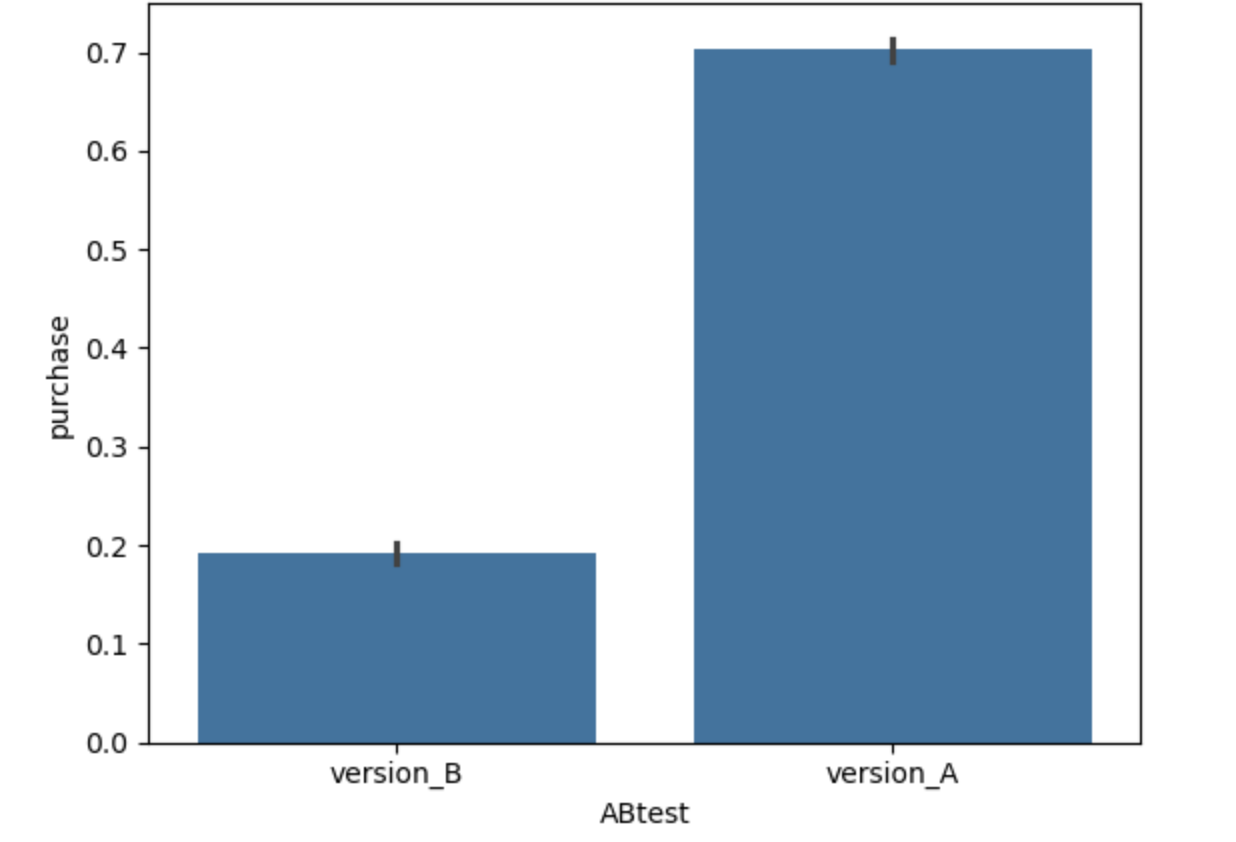

Additionally, customers referred by Google to the webshop have a significantly lower probability of making purchase behavior compared to customers referred by other platforms. Customers who use an Apple device have a significantly high probability of purchase. To further enhance our understanding, we applied supervised machine learning techniques and utilized the LIME framework. The findings indicate that customers who viewed the original motto, were not referred by Google, and used Apple devices exhibited the highest likelihood of completing a purchase, with a probability of 95%. 

Figure 2: HPrediction of highest purchase probability
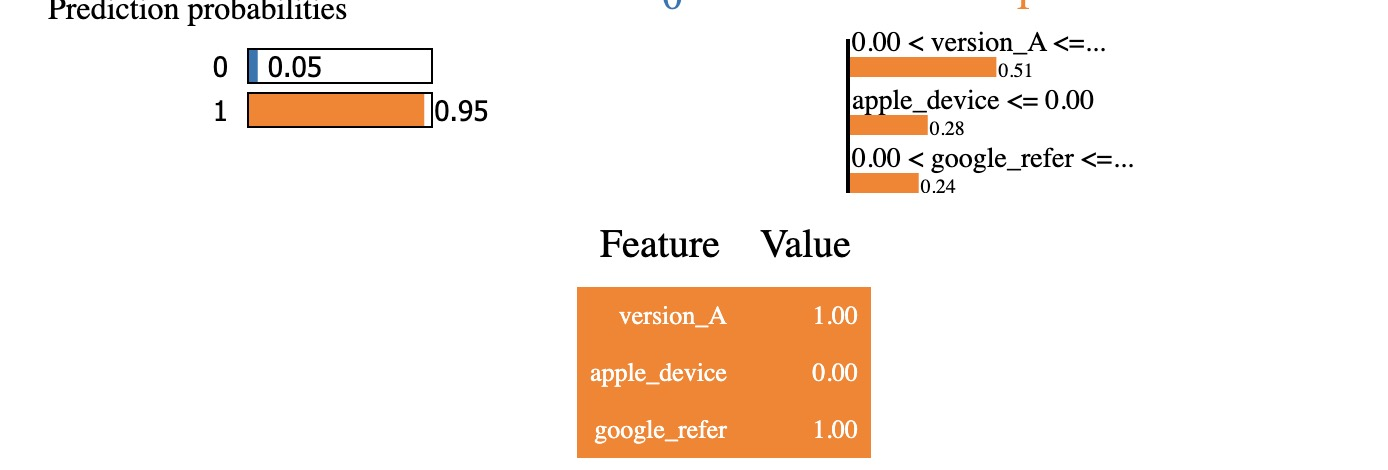



**Implications for The North Face**

Now that we have established the new motto's negative effect on purchase intentions, several strategic recommendations can be made for The North Face:

* Do not change the original motto: Given the strong evidence supporting the effectiveness of the original motto, "Never stop exploring," the organization should prioritize reinstating it across all marketing channels to enhance customer engagement and increase sales.
* Refine Marketing Strategies: With the insight that customers referred from Google have lower purchase probabilities, the organization should evaluate its referral strategies. Exploring alternative channels and optimizing content for platforms outside Google may lead to better customer acquisition results.
* Targeted Campaigns for Apple Users: Since Apple device users showed the highest likelihood of purchasing, The North Face could develop targeted marketing campaigns that specifically tailor to this demographic. This could involve exclusive promotions or content tailored for Apple users.

## Limitations and Next Steps

Several limitations in this A/B test affect the conclusions and the overall communication challenge for The North Face that might need to take into consideration.
1. Data Collection Limitations
The dataset only includes online customers, excluding those who make offline purchases. As a result, the test does not represent the full customer base. Additionally, the one-month testing period might have introduced seasonal or promotional biases, which might influence customer behavior. Additionally, due to the anonymization of the data, which is important for privacy, it limited the inclusion of customer purchase history or loyalty data, which could provide more in-depth analysis.
2. Data Preparation Limitations
While we assumed equal exposure to both versions of the webshop, the slight imbalance in session distribution (49.5% vs. 50.5%) may introduce bias. The simplification of referral sources into two categories (Google vs. others) did not specify other compared platforms. Moreover, the lack of user information like demographics such as age or income limits the test to find how different groups of customers responded to the change in motto.
3. Model and Hypothesis Testing Limitations
The model did not account for potential interactions between variables or other relevant factors like time spent on the site, and product categories viewed, which could have improved the model’s accuracy. While the confidence intervals suggested significant effects, these results should be interpreted cautiously given the model’s limitations.
Next Steps
Future tests should include offline purchases, extend the test period, and incorporate more detailed referral and demographic data. The model should also include additional variables and explore possible interaction effects. These steps would offer a more comprehensive understanding of customer behavior, helping The North Face refine its communication strategies and optimize purchase outcomes.

## Ethical and Normative Considerations

Several ethical and normative considerations must be addressed when conducting an A/B test like this one for The North Face.

At the individual level, privacy is a key concern. Although customer data was anonymized, individuals may not have been fully aware that their behavior was being tracked for marketing purposes. According to Tucker (2019), repurposing data without explicit consent can raise ethical issues. Transparency in data collection and usage is essential to maintain trust and ensure customers are aware of how their data is being used.

At the societal level, there are broader implications for data-driven marketing strategies. Focusing solely on online data, as in this case, excludes offline customers, potentially leading to biased conclusions that do not represent the entire customer base. According to recent research, digital exclusion is still a huge problem for the fast-developing digital environment (Wilson-Menzfeld et al., 2024).

To address these considerations, The North Face should implement transparent data practices, ensuring customers are informed and their privacy is respected. Expanding future studies to include both online and offline customers, which can help address potential biases.

## References

* Liu, Y. (2022, January). Observing consumer market changes from brand slogan changes. In 2021 International Conference on Culture, Design and Social Development (CDSD 2021) (pp. 266-269). Atlantis Press.

* Mathur, L. K., & Mathur, I. (1995). The effect of advertising slogan changes on the market values of firms. Journal of Advertising Research, 35(1), 59.

* Setiani, T., Antoni, & Sujoko, A. (2018). The effect of new identity, new image, and repositioning as a process of rebranding towards brand loyalty, brand associations, perceived quality as part of brand equity. Russian Journal of Agricultural and Socio-Economic Sciences, 76(4), 253–263. https://doi.org/10.18551/rjoas.2018-04.27

* Tucker, C. (2019). Privacy, Algorithms, and Artiﬁcial Intelligence. In A. Agrawal, J. Gans, & A. Goldfarb (Eds.), The Economics of Artificial Intelligence: An Agenda (pp. 423–437). University of Chicago Press.

* Wilson-Menzfeld, G., Erfani, G., Young-Murphy, L., Charlton, W., De Luca, H., Brittain, K., & Steven, A. (2024). Identifying and understanding digital exclusion: a mixed-methods study. Behaviour & Information Technology, 1-18.